# Import

## Library

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Para generar datos
from sklearn import datasets 
# Importamos librerias de Clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import AgglomerativeClustering
# Importamos silhouette_score
from sklearn.metrics import silhouette_score , rand_score
# from helpers import report_clustering_kmeans, report_clustering_hierarchical
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import plotly.express as py 
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics


## Dataset

In [5]:
df = pd.read_csv( 'vinos.csv')
df.head()

,Vino,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,2,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,3,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,4,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,5,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# EDA

In [19]:
df_X = df.drop('Vino',axis=1)
df_X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [20]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [40]:
x = df_X.columns.values
y = df_X.describe()
# sns.kdeplot(x,y)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
y[ ]

In [8]:
# X = df[['total','ins_losses']]
# X

In [9]:
# scaler = MinMaxScaler()

In [10]:
# X_scal = pd.DataFrame(scaler.fit_transform(X))

In [69]:
# y = iris[['Species']]
# enc = preprocessing.LabelEncoder()
# y = enc.fit_transform(y)
# y

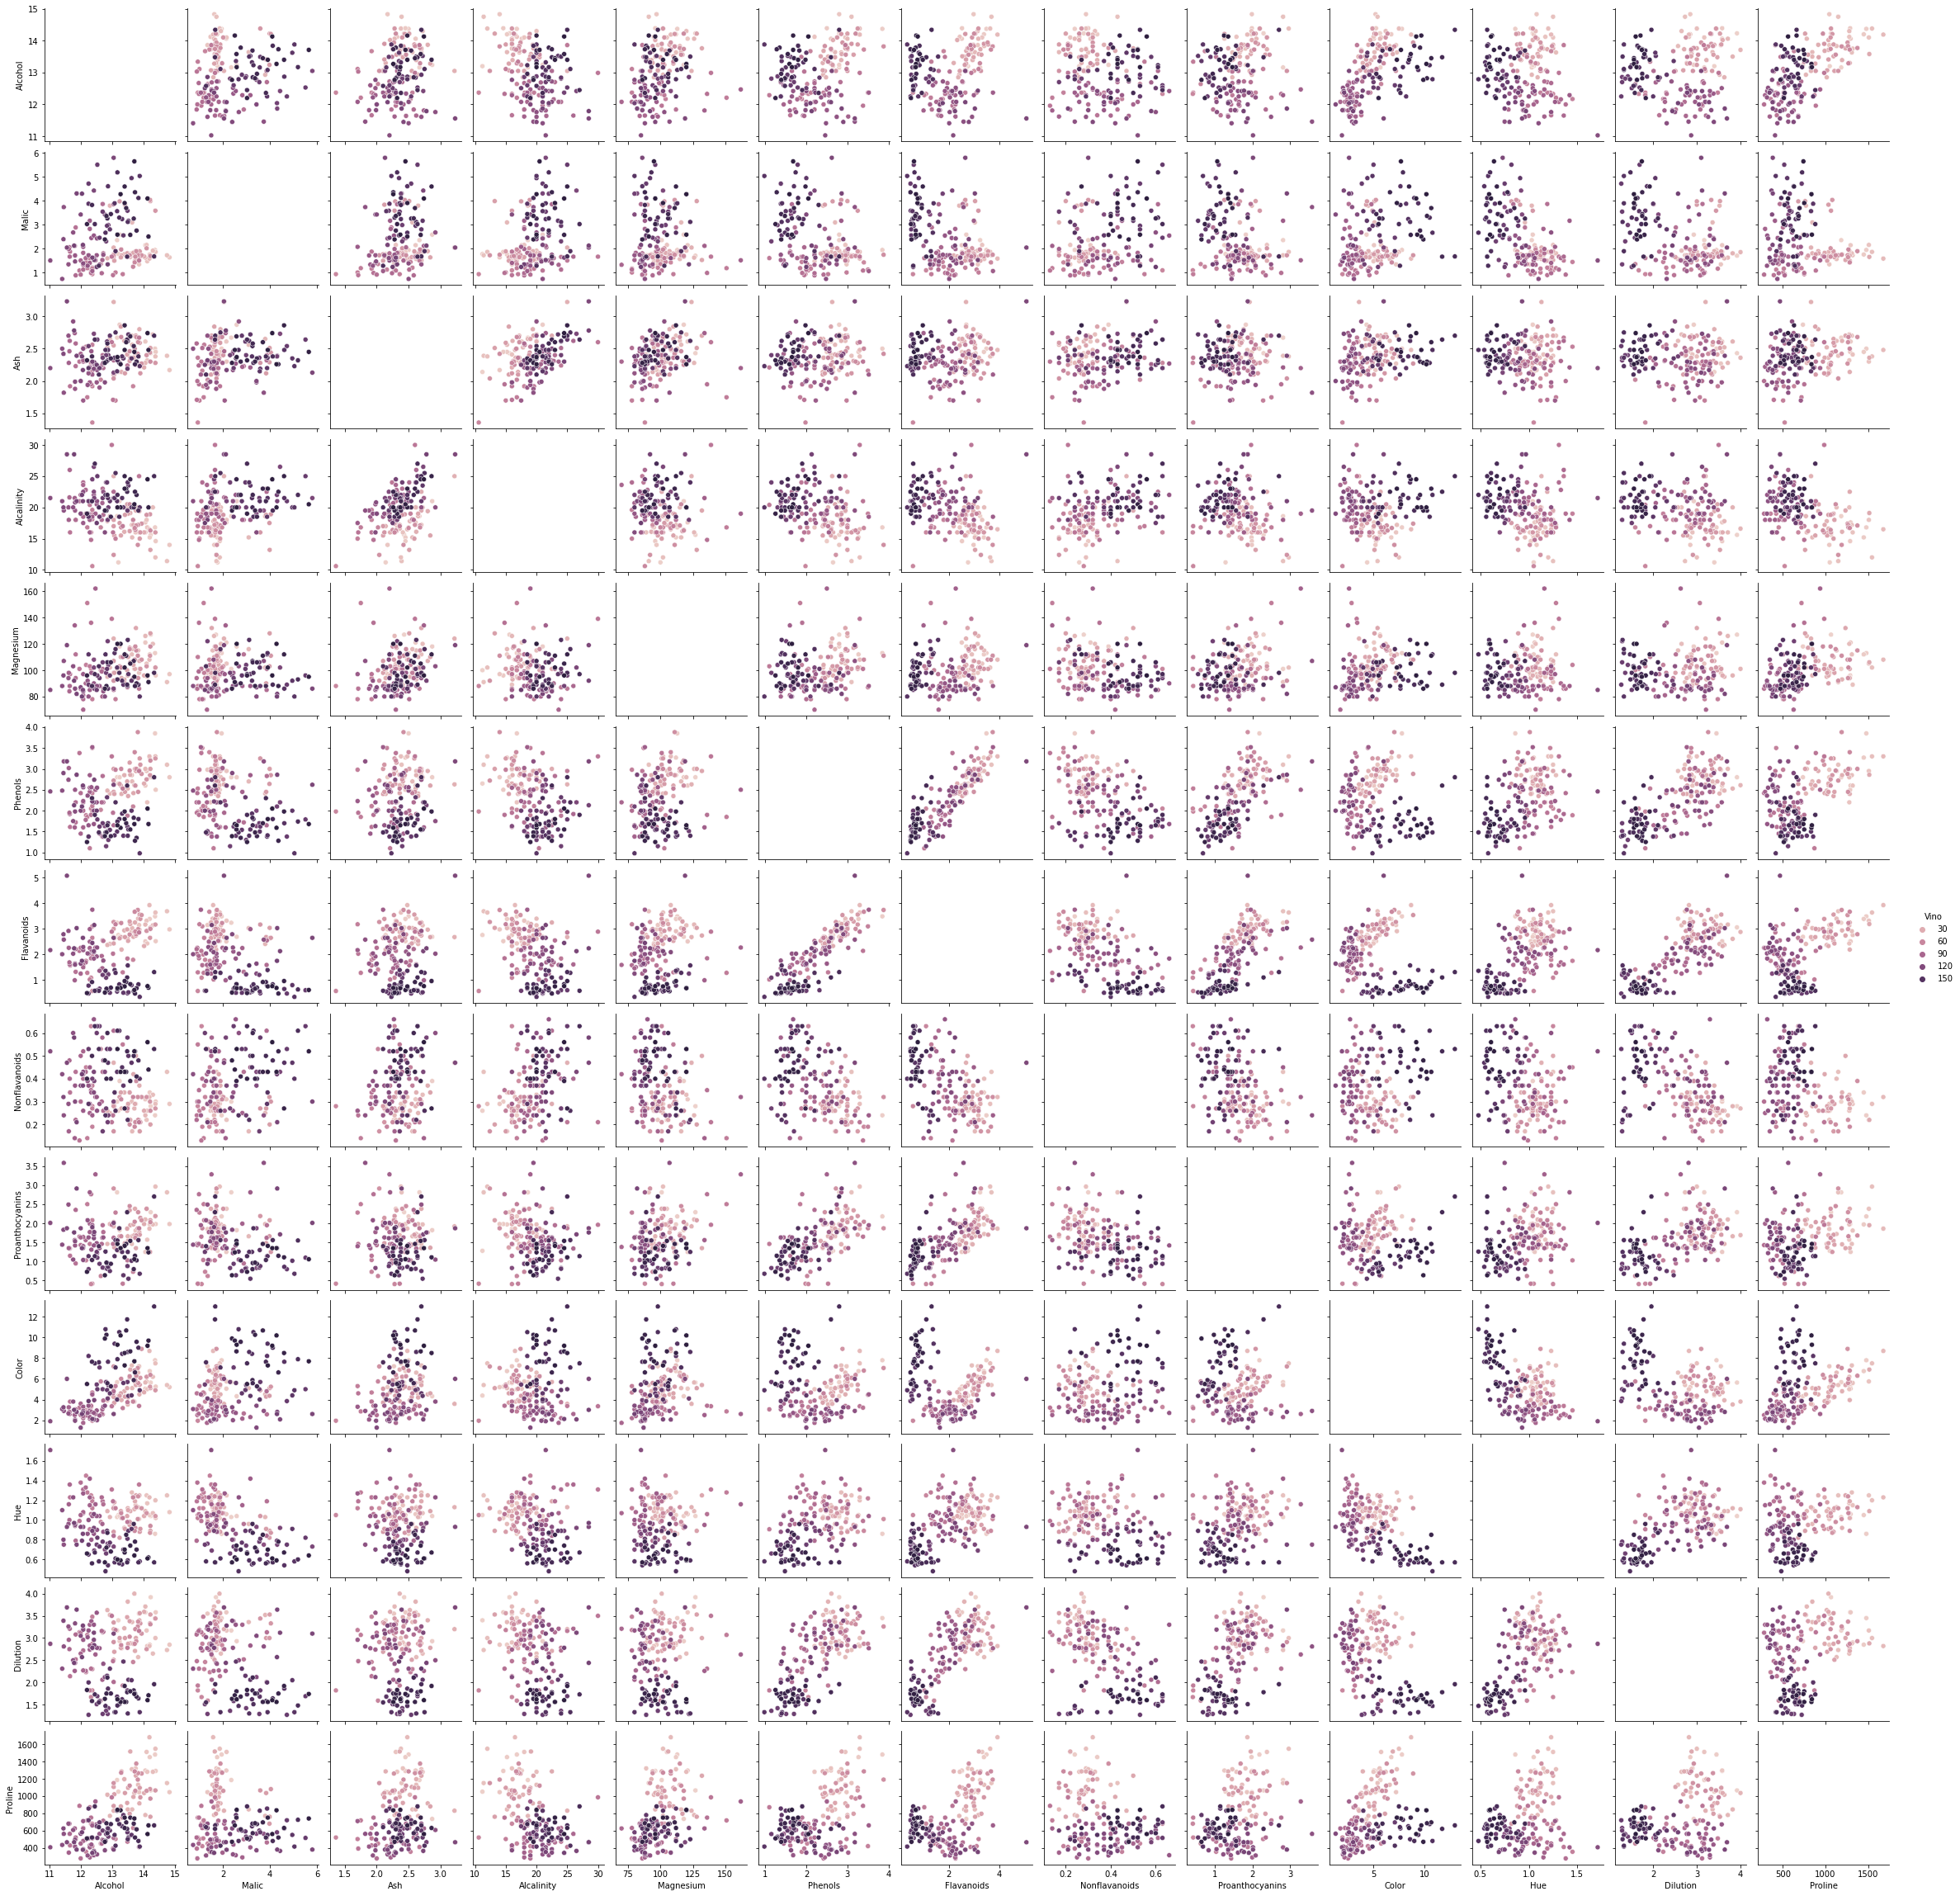

In [13]:
sns.pairplot(df,hue='Vino')

# KMeans

In [71]:
pd.DataFrame(X_scal)

,0,1
0,0.716667,0.556369
1,0.677778,0.456842
2,0.705556,0.246363
3,0.916667,0.532357
4,0.338889,0.739802
5,0.427778,0.510220
6,0.272222,0.752209
7,0.572222,0.613496
8,0.000000,0.475765
9,0.666667,0.548335


<AxesSubplot:xlabel='0', ylabel='1'>

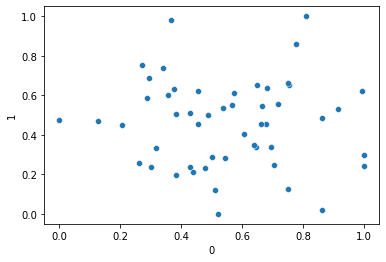

In [72]:
# Plot reference
sns.scatterplot(x=0,y=1 ,data=pd.DataFrame(X_scal))

## KMeans train

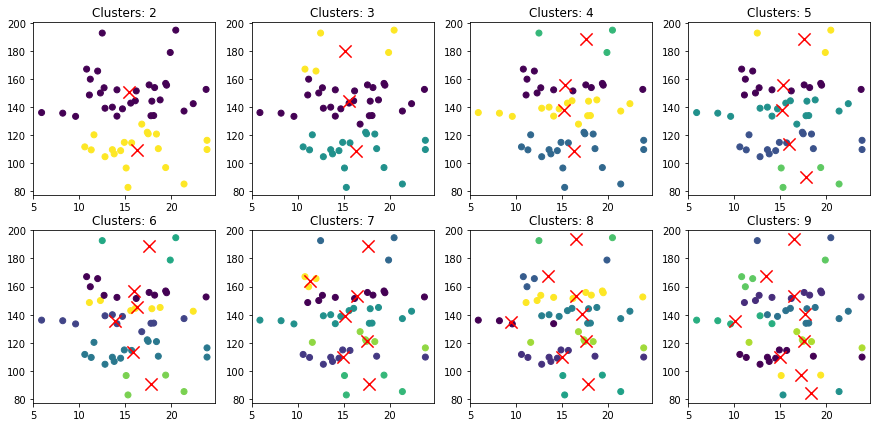

In [73]:
# Metrics
dist_cent = []
sil_list = []
rand_list = []

fig,axs = plt.subplots(2,4,figsize=(15,7))
axs = axs.ravel()    
for i,k in enumerate(range(2, 10)):
    # Creamos el objeto de clustering
    cluster = KMeans(n_clusters=k).fit(X)
    centers_i = cluster.cluster_centers_ # Centroide de cada cluster
    labels_i = cluster.labels_ # Labels de cada muestra
    # Silhouttte Score
    sil_score_i = silhouette_score(X,labels_i)
    sil_list.append(sil_score_i)        
#     # Rand_Index
# #     rand_index_i = metrics.adjusted_rand_score(y,labels_i)
# #     rand_list.append(rand_index_i)
    dist_cent.append(cluster.inertia_)
    # Plots de los clusters
    axs[i].scatter(x='total',y='ins_losses' ,data=X,c=labels_i)
    axs[i].scatter(centers_i[:,0], centers_i[:,1], marker="x", color='r',s=150)
    axs[i].set_title('Clusters: ' + str(k))
plt.show()

## Performance Metrics

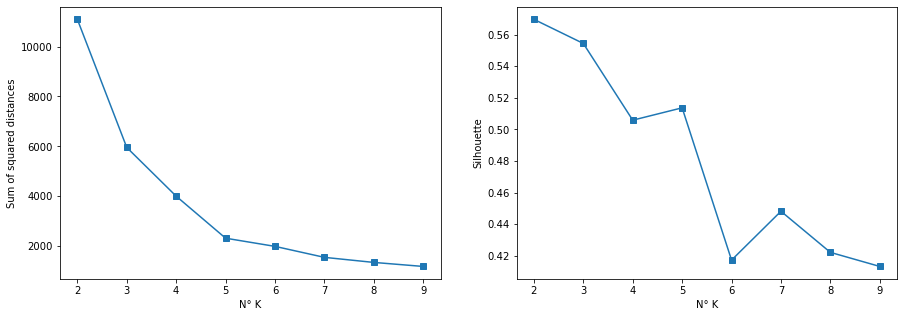

In [74]:
# Sum of squared distances
fig, axs = plt.subplots(1,2,figsize=(15,5))    
axs[0].plot(range(2, 10), dist_cent, marker='s');
axs[0].set_xlabel('N° K')
axs[0].set_ylabel('Sum of squared distances')
# Silhoute plot
axs[1].plot(range(2, 10), sil_list, marker='s');
axs[1].set_xlabel('N° K')
axs[1].set_ylabel('Silhouette')
# Rand Index plot
# axs[2].plot(range(2, 10), rand_list, marker='s');
# axs[2].set_xlabel('N° K')
# axs[2].set_ylabel('Rand Index')    
plt.show()

In [75]:
X_scal

,0,1
0,0.716667,0.556369
1,0.677778,0.456842
2,0.705556,0.246363
3,0.916667,0.532357
4,0.338889,0.739802
5,0.427778,0.510220
6,0.272222,0.752209
7,0.572222,0.613496
8,0.000000,0.475765
9,0.666667,0.548335


In [81]:
# Make k-means clusterer
km = KMeans(3, random_state=0)
# Fit clusterer
km.fit(X_scal)
# Predict values
X_scal["group"] = km.predict(X_scal)
# View first few observations
X_scal.head(10)

,0,1,group
0,0.716667,0.556369,1
1,0.677778,0.456842,1
2,0.705556,0.246363,0
3,0.916667,0.532357,1
4,0.338889,0.739802,2
5,0.427778,0.510220,2
6,0.272222,0.752209,2
7,0.572222,0.613496,1
8,0.000000,0.475765,2
9,0.666667,0.548335,1


## Real data set and the result K-means

<AxesSubplot:xlabel='0', ylabel='1'>

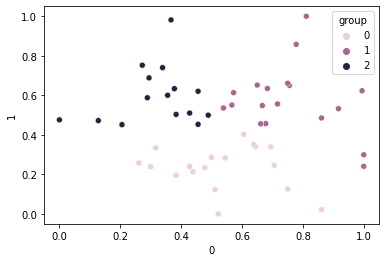

In [87]:
sns.scatterplot(x=0,y=1, data=X_scal,hue='group', color = 'blue')